In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df1=pd.read_csv('Normal_bearing.csv')
df2=pd.read_csv('outer_race_fault_test_2.csv')
df3=pd.read_csv('outer_race_fault_test_3.csv')
df4=pd.read_csv('inner_race_fault.csv')
df5=pd.read_csv('roller_element_fault.csv')

In [3]:
df = pd.concat([df1,df2,df3,df4,df5])
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
1,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
3,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
4,0.479,-0.659,-0.116594,0.093409,0.149395,-0.002756,1.290804,3.206260,-1.281329,Normal
...,...,...,...,...,...,...,...,...,...,...
460,0.701,-0.764,-0.114628,0.131560,0.174490,0.134774,1.459441,4.017426,-1.522231,Roller Element
461,0.571,-0.667,-0.114702,0.126378,0.170667,0.071571,1.195710,3.345699,-1.487915,Roller Element
462,0.623,-0.708,-0.114239,0.126722,0.170611,0.100394,1.255684,3.651572,-1.493457,Roller Element
463,0.752,-0.686,-0.114455,0.128396,0.172002,0.086076,1.189483,4.372047,-1.502786,Roller Element


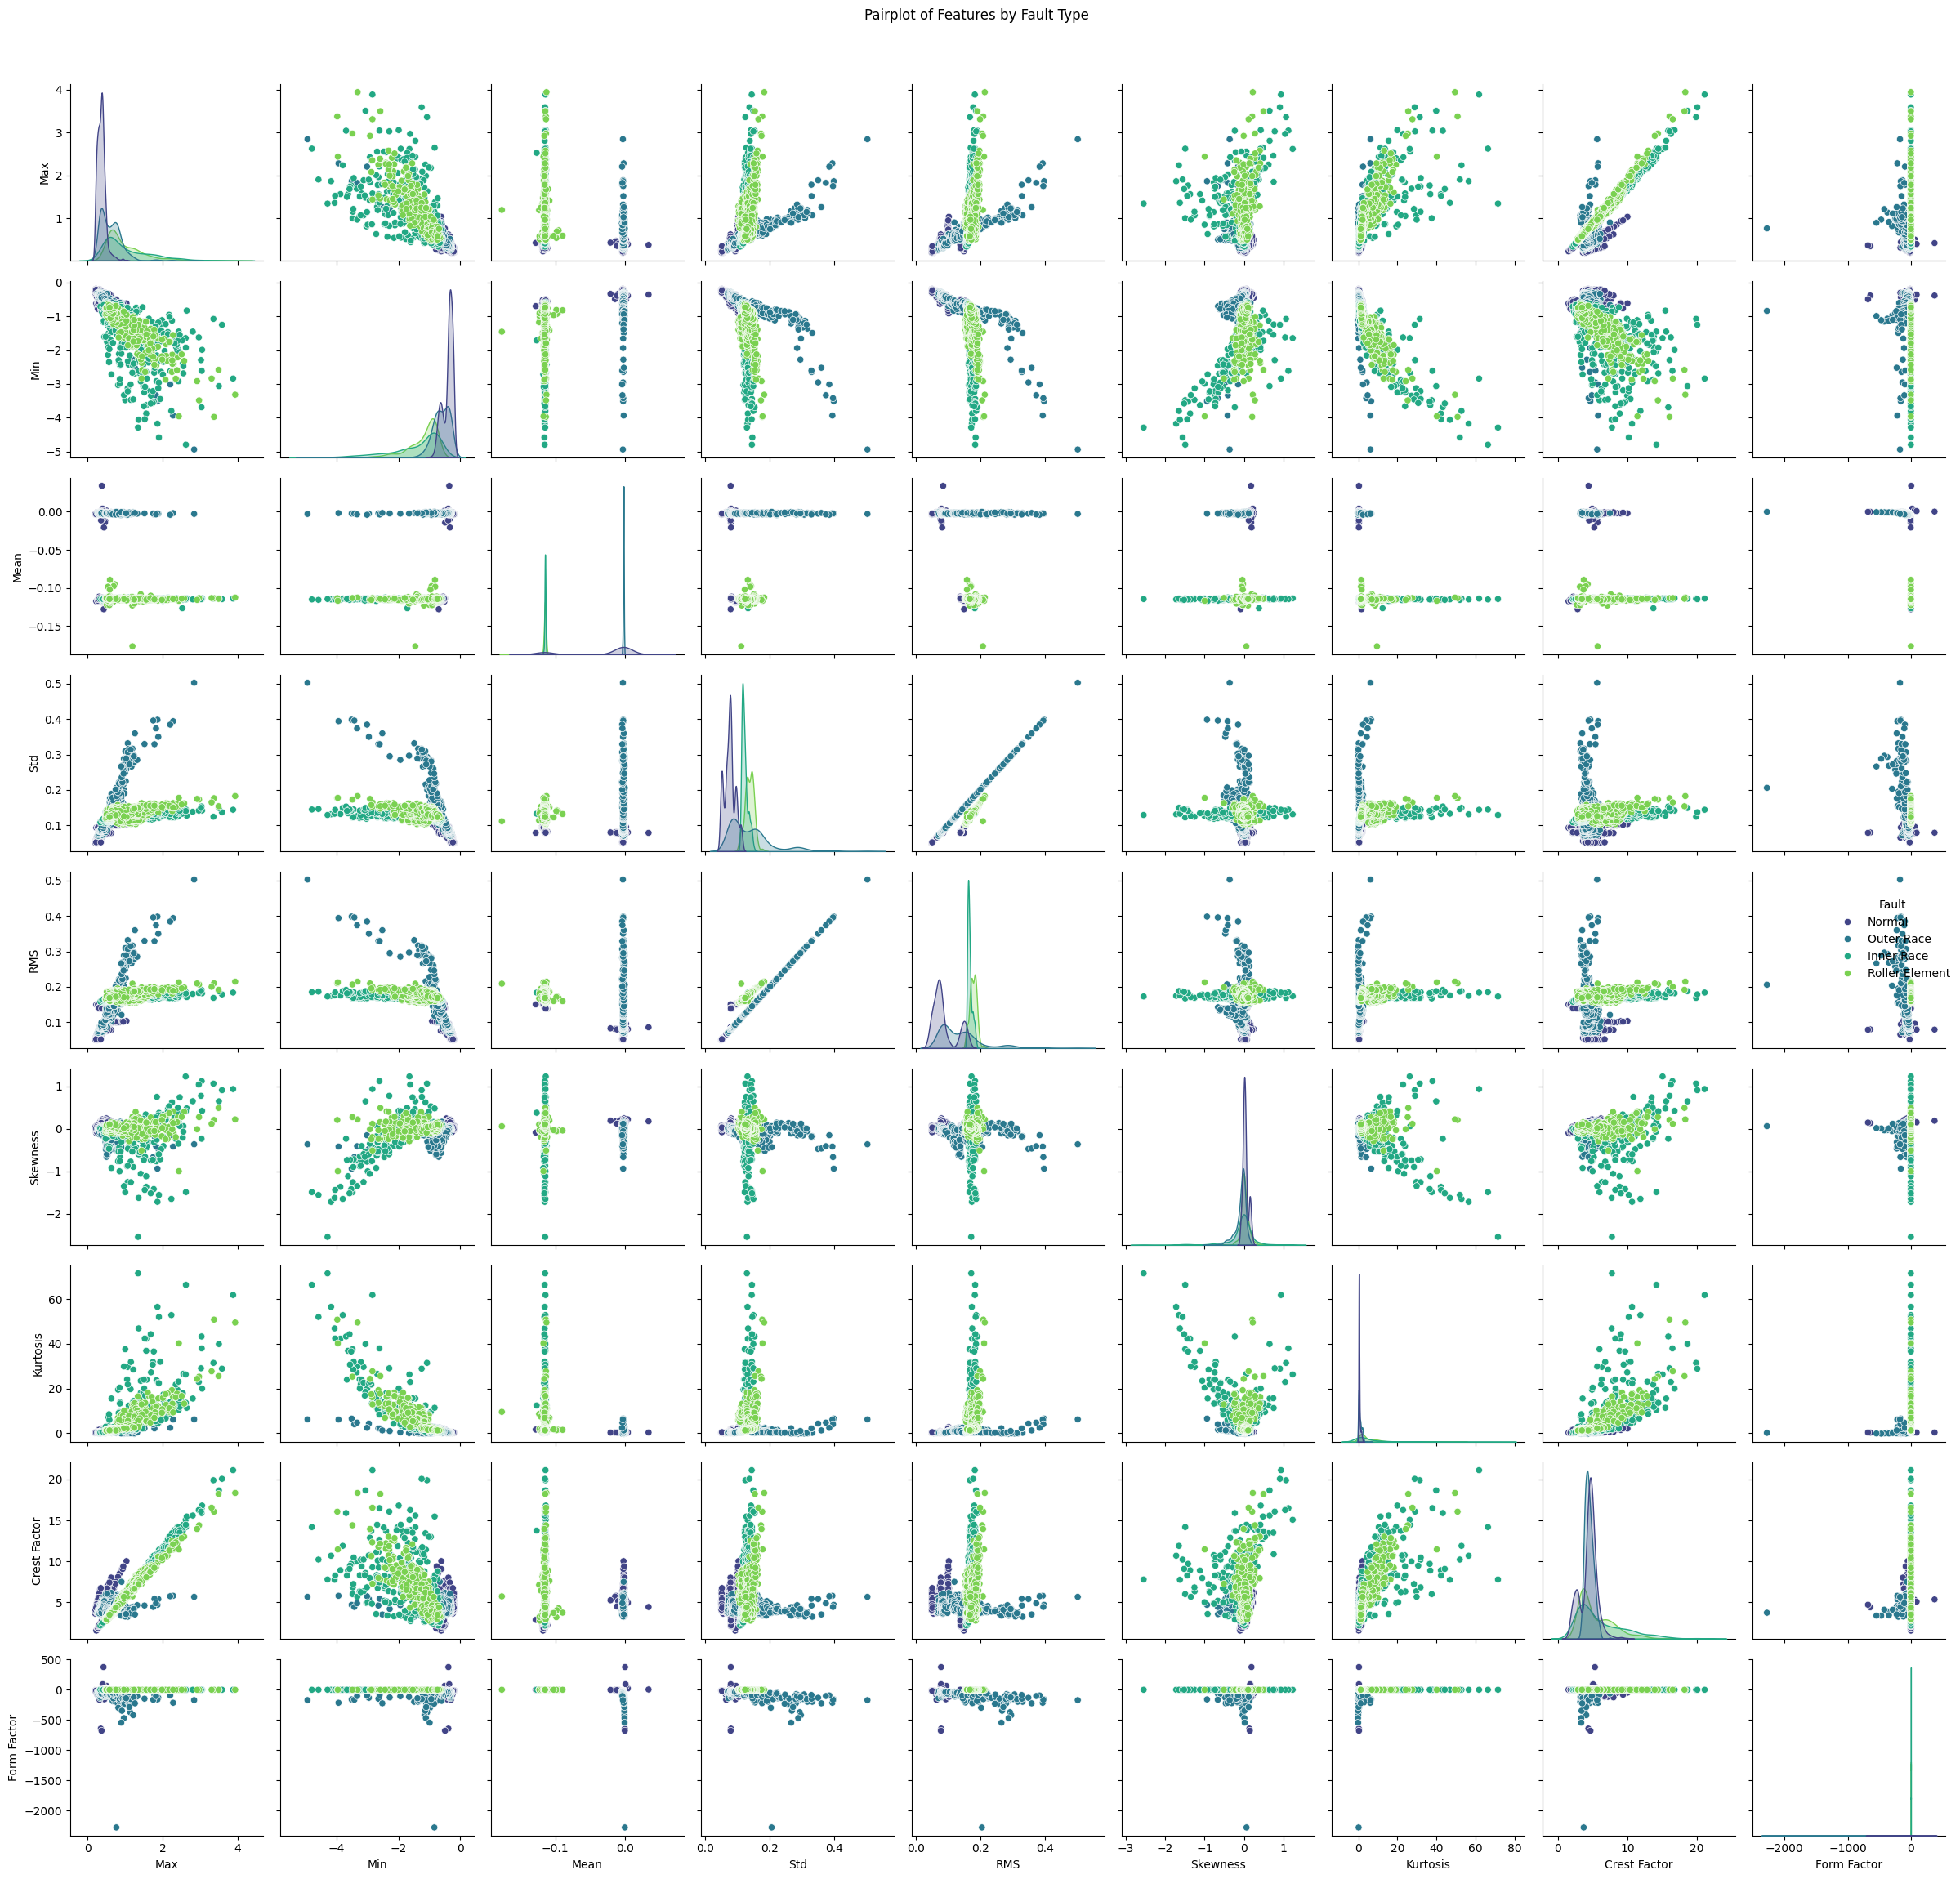

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot with colors based on the "Fault" column
plot = sns.pairplot(df, hue="Fault", palette="viridis")

# Add a title to the overall figure
plt.suptitle("Pairplot of Features by Fault Type", y=1.02)

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
df['Fault'].unique()

array(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'],
      dtype=object)

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Fault', axis=1)
y = df['Fault']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

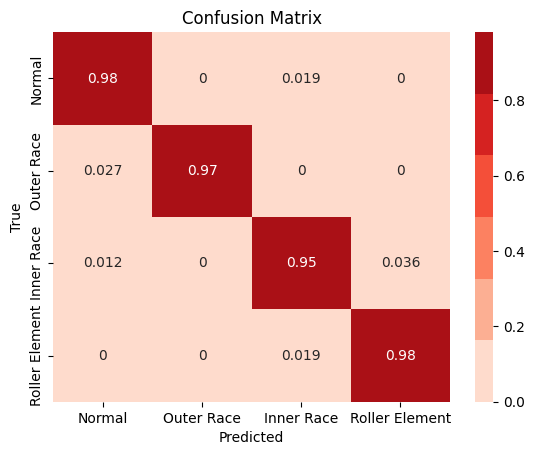

F1 Score: 0.9780
Accuracy: 0.9780701754385965


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Train the Random Forest model
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Define labels
labels = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

# Plot the confusion matrix
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True, cmap=colormap, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

from sklearn.metrics import f1_score

rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets
print(f"F1 Score: {f1:.4f}")


from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# Testing using Random Forest Model


In [8]:
Test_no=2
Bearing_no=1

test_2 = pd.read_csv("Time_feature_matrix_Bearing_{}_Test_{}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')


In [9]:
y_pred_test_2 = rf_model.predict(test_2)
y_pred_test_2

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Outer Race', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Outer Race', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal

In [10]:
test_2['Fault']=y_pred_test_2


In [11]:
test_2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,Normal
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,Normal
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,Normal
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,Normal
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,Normal
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,Outer Race
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,Outer Race
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,Outer Race
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,Normal


In [12]:
test_2.index = pd.to_datetime(test_2.index)

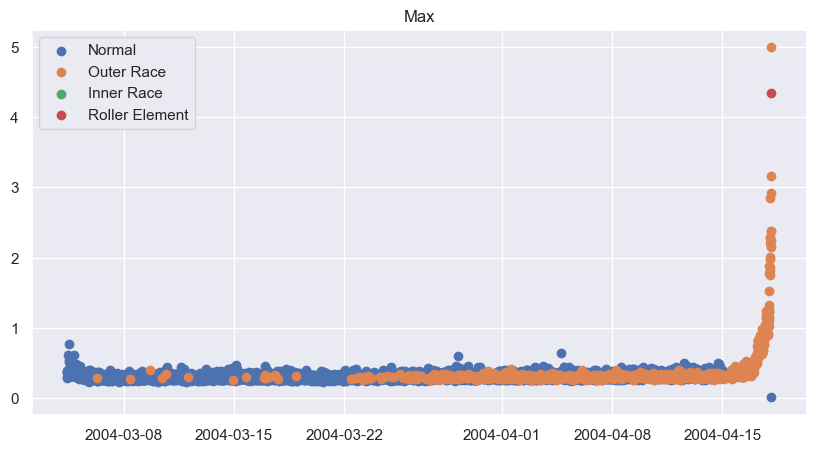

In [41]:
Test_no=3
Bearing_no=3


test_2 = pd.read_csv("Time_feature_matrix_Bearing_{}_Test_{}.csv".format(Bearing_no,Test_no),index_col='Unnamed: 0')
y_pred_test_2 = rf_model.predict(test_2)
test_2['Fault']=y_pred_test_2
test_2.index = pd.to_datetime(test_2.index)


norm = test_2[test_2['Fault']=='Normal']
Out_rac = test_2[test_2['Fault']=='Outer Race']
iner_rac = test_2[test_2['Fault']=='Inner Race']
roll_elem = test_2[test_2['Fault']=='Roller Element']

###############################################################

col='Max'                      # Change this value to any column name 
plt.figure(figsize=(10, 5))
plt.scatter(norm.index,norm[col])
plt.scatter(Out_rac.index,Out_rac[col])
plt.scatter(iner_rac.index,iner_rac[col])
plt.scatter(roll_elem.index,roll_elem[col])

plt.legend(['Normal','Outer Race','Inner Race','Roller Element'])
plt.title(col)
plt.show()

<Axes: xlabel='None', ylabel='Max'>

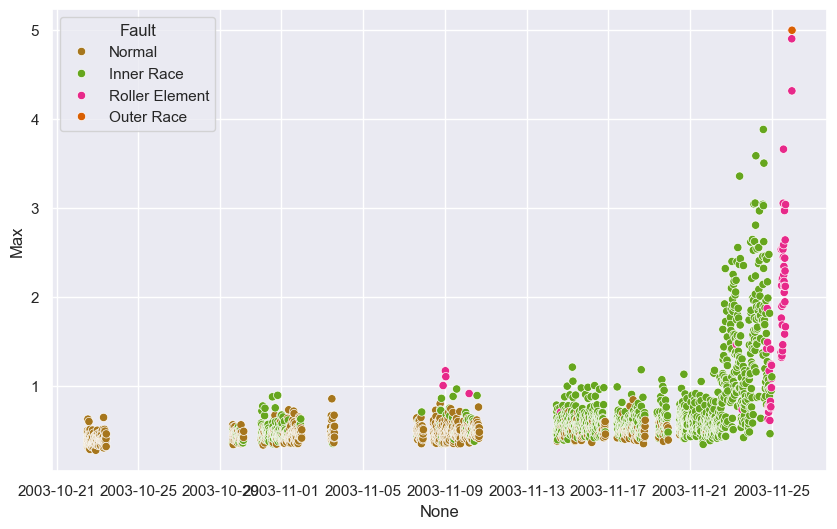

In [14]:
 sns.set(rc={'figure.figsize':(10,6)})
 sns.scatterplot(x=test_2.index,y='Max',hue='Fault',data=test_2,palette='Dark2_r')

# Additional: Using Multiple Classifiers
We will now use SVM, 1D CNN, and LSTM models (as in the dimensionality reduction notebook) for comparison on the full feature set.

# Feature Importance Analysis
Let's analyze the relevancy of each feature in the bearing fault diagnosis to understand which features are most important for classification.

C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_20216\350706696.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


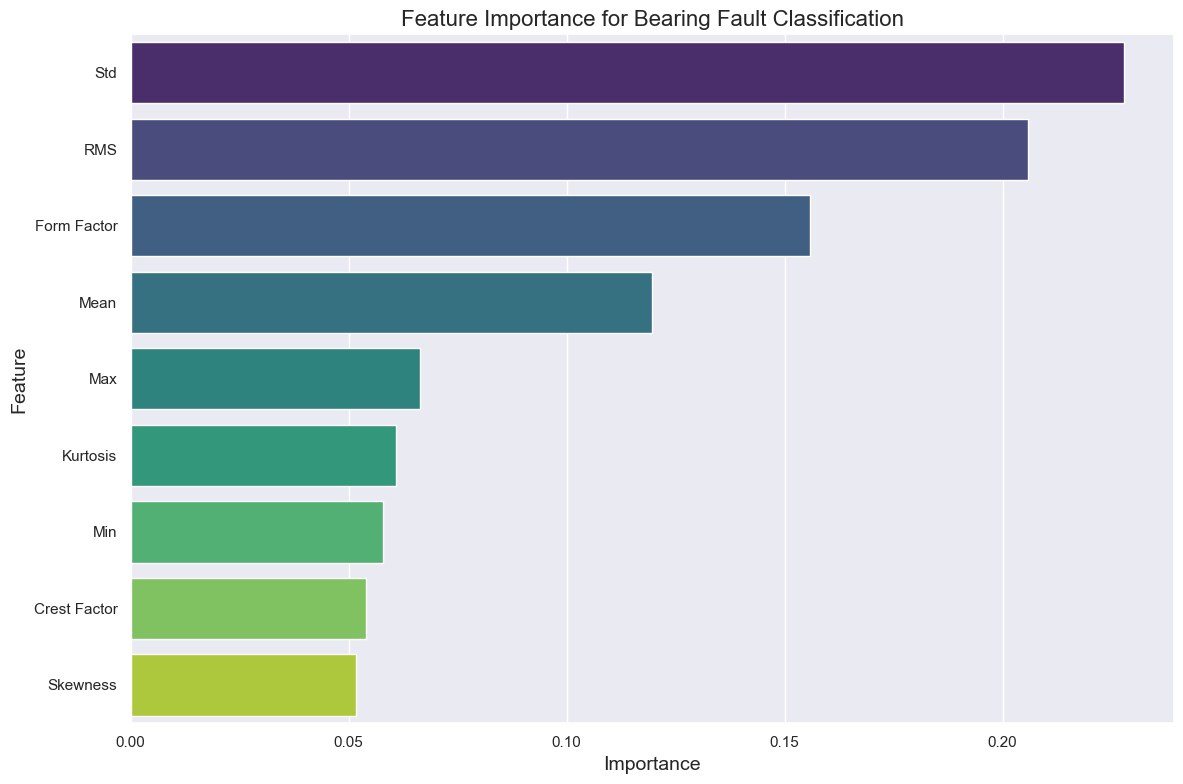

Feature Importance Ranking:
        Feature  Importance
3           Std    0.227917
4           RMS    0.205824
8   Form Factor    0.155895
2          Mean    0.119678
0           Max    0.066306
6      Kurtosis    0.060909
1           Min    0.057942
7  Crest Factor    0.053908
5      Skewness    0.051619


In [15]:
# Feature importance from Random Forest model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Get feature importance from the trained Random Forest model
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to see importance values with their names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Bearing Fault Classification', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

# Print feature importance table
print("Feature Importance Ranking:")
print(importance_df)

In [16]:
# Correlation heatmap to visualize feature relationships
plt.figure(figsize=(14, 10))
correlation = df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Normal'

<Figure size 1400x1000 with 0 Axes>

Top 1 features: Std
Accuracy with top 1 features: 0.6864

Top 3 features: Form Factor, RMS, Std
Accuracy with top 3 features: 0.8596

Top 5 features: Max, Mean, Form Factor, RMS, Std
Accuracy with top 5 features: 0.9364

Top 9 features: Skewness, Crest Factor, Min, Kurtosis, Max, Mean, Form Factor, RMS, Std
Accuracy with top 9 features: 0.9759



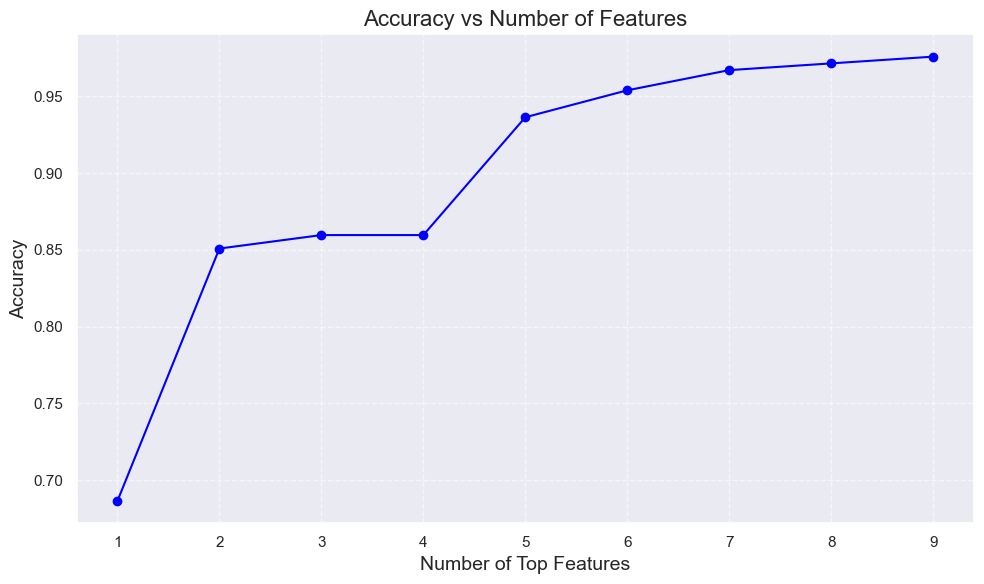

In [17]:
# Evaluate model performance with different feature combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Let's create functions to evaluate model with top N features
def evaluate_top_n_features(n, X_train, X_test, y_train, y_test, feature_importances, feature_names):
    # Get indices of top N features
    top_indices = np.argsort(feature_importances)[-n:]
    selected_features = feature_names[top_indices]
    
    # Train model with only these features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    model = RandomForestClassifier(random_state=42).fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, selected_features

# Test with different numbers of top features
feature_counts = list(range(1, len(feature_names) + 1))
accuracies = []

for count in feature_counts:
    accuracy, selected_features = evaluate_top_n_features(
        count, X_train, X_test, y_train, y_test, 
        feature_importance, np.array(feature_names)
    )
    accuracies.append(accuracy)
    if count in [1, 3, 5, len(feature_names)]:
        print(f"Top {count} features: {', '.join(selected_features)}")
        print(f"Accuracy with top {count} features: {accuracy:.4f}\n")

# Plot accuracy vs number of features
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Top Features', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs Number of Features', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_20216\858476648.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Permutation Importance', y='Feature', data=perm_importance_df, palette='plasma')


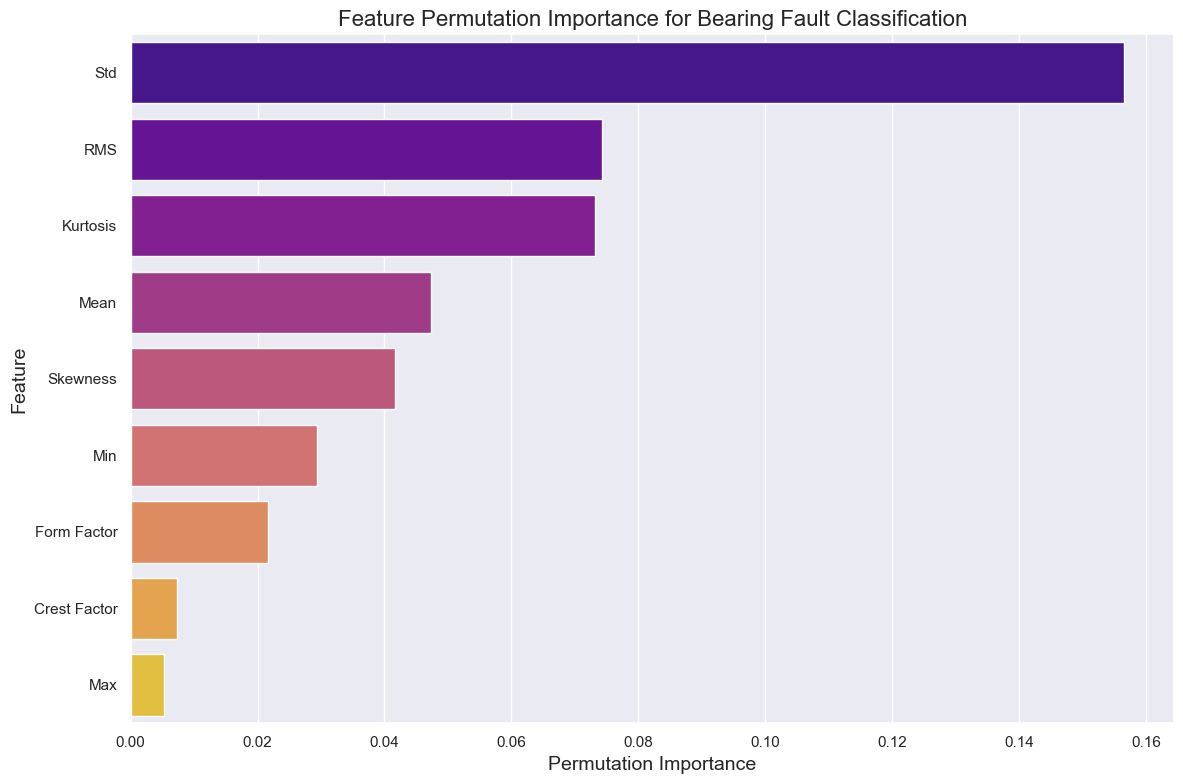

Feature Importance Comparison:
        Feature  Model Importance  Permutation Importance
3           Std          0.227917                0.156579
4           RMS          0.205824                0.074342
8   Form Factor          0.155895                0.021711
2          Mean          0.119678                0.047368
0           Max          0.066306                0.005263
6      Kurtosis          0.060909                0.073246
1           Min          0.057942                0.029386
7  Crest Factor          0.053908                0.007237
5      Skewness          0.051619                0.041667


In [18]:
# Feature importance analysis using permutation importance
from sklearn.inspection import permutation_importance

# This measures how model performance decreases when a feature is randomly shuffled
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = result.importances_mean

# Create DataFrame with permutation importance results
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Permutation Importance': perm_importance})
perm_importance_df = perm_importance_df.sort_values('Permutation Importance', ascending=False)

# Plot permutation importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Permutation Importance', y='Feature', data=perm_importance_df, palette='plasma')
plt.title('Feature Permutation Importance for Bearing Fault Classification', fontsize=16)
plt.xlabel('Permutation Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

# Compare with feature importance from model
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Model Importance': feature_importance,
    'Permutation Importance': perm_importance
})
comparison_df = comparison_df.sort_values('Model Importance', ascending=False)
print("Feature Importance Comparison:")
print(comparison_df)

d:\Bearing_fault_ diagnosis\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 1400x1000 with 0 Axes>

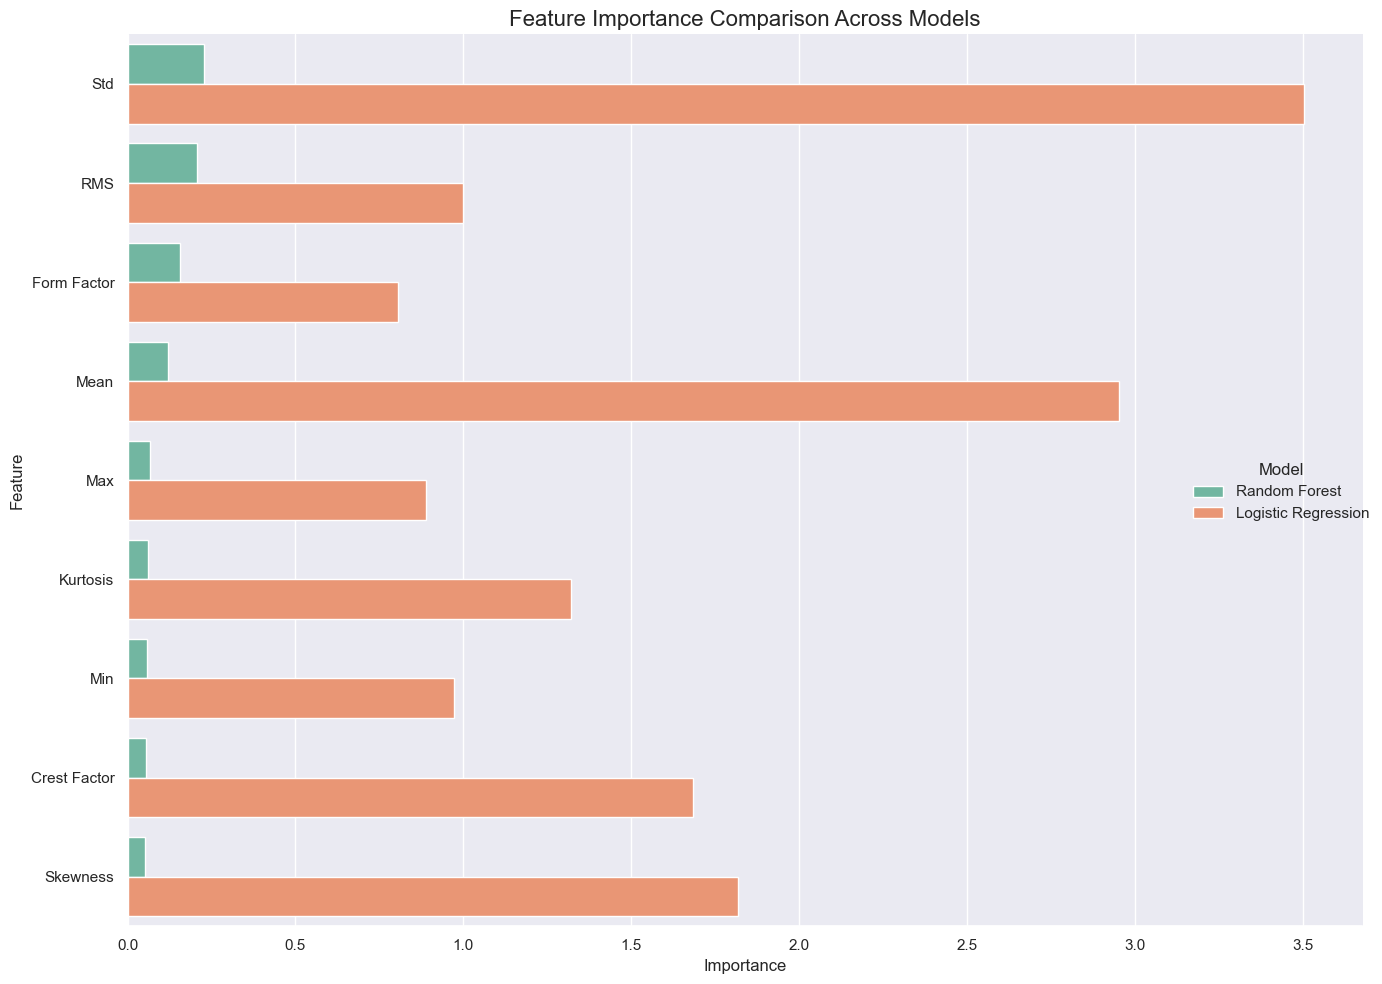

In [19]:
# Feature importance across different models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Scale features for logistic regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_model.fit(X_train_scaled, y_train)

# Get LR coefficients (need to take absolute values for multi-class)
lr_importances = np.mean(np.abs(lr_model.coef_), axis=0)

# Create importances DataFrame for comparison
model_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': feature_importance,
    'Logistic Regression': lr_importances
})

# Melt the DataFrame for easier plotting
model_comparison_melted = pd.melt(
    model_comparison, 
    id_vars='Feature', 
    var_name='Model', 
    value_name='Importance'
)

# Sort by Random Forest importance for consistency
top_features = model_comparison.sort_values('Random Forest', ascending=False)['Feature'].tolist()
model_comparison_melted['Feature'] = pd.Categorical(model_comparison_melted['Feature'], categories=top_features, ordered=True)

# Plot comparison
plt.figure(figsize=(14, 10))
g = sns.catplot(x='Importance', y='Feature', hue='Model', data=model_comparison_melted, 
             kind='bar', height=10, aspect=1.2, palette='Set2')
plt.title('Feature Importance Comparison Across Models', fontsize=16)
plt.tight_layout()
plt.show()

## Feature Importance for Real-time Monitoring

Based on the feature importance analysis, we can now identify which features are most critical for real-time bearing fault diagnosis. This can help in designing more efficient monitoring systems that focus on the most important features.

In [20]:
# SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
svm = SVC(kernel='rbf', C=1, gamma='auto')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
svm_acc = accuracy_score(y_test, y_pred_svm)

SVM Confusion Matrix:
[[ 76   1   1   6]
 [ 12 121  22   0]
 [  0  19  93   0]
 [ 10   0   0  95]]
                precision    recall  f1-score   support

    Inner Race       0.78      0.90      0.84        84
        Normal       0.86      0.78      0.82       155
    Outer Race       0.80      0.83      0.82       112
Roller Element       0.94      0.90      0.92       105

      accuracy                           0.84       456
     macro avg       0.84      0.86      0.85       456
  weighted avg       0.85      0.84      0.84       456



In [21]:
# Encode labels for PyTorch models
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [22]:
# 1D CNN Classifier using PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X_train_cnn = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(2)
X_test_cnn = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(2)
y_train_cnn = torch.tensor(y_train_enc, dtype=torch.long)
y_test_cnn = torch.tensor(y_test_enc, dtype=torch.long)

train_dataset = TensorDataset(X_train_cnn, y_train_cnn)
test_dataset = TensorDataset(X_test_cnn, y_test_cnn)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

class CNN1D(nn.Module):
    def __init__(self, num_classes):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear((X_train_cnn.shape[1]-1)*32, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, num_classes)
    def forward(self, x):
        x = x.permute(0,2,1)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

num_classes = len(np.unique(y_train_enc))
model = CNN1D(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for xb, yb in test_loader:
        out = model(xb)
        _, pred = torch.max(out, 1)
        correct += (pred == yb).sum().item()
        total += yb.size(0)
cnn_acc = correct / total
print(f'1D CNN (PyTorch) Test Accuracy: {cnn_acc:.2f}')

1D CNN (PyTorch) Test Accuracy: 0.84


In [23]:
# LSTM Classifier using PyTorch
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMNet, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, num_classes)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

X_train_lstm = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
X_test_lstm = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
train_dataset_lstm = TensorDataset(X_train_lstm, y_train_cnn)
test_dataset_lstm = TensorDataset(X_test_lstm, y_test_cnn)
train_loader_lstm = DataLoader(train_dataset_lstm, batch_size=32, shuffle=True)
test_loader_lstm = DataLoader(test_dataset_lstm, batch_size=32)

model_lstm = LSTMNet(X_train_lstm.shape[2], 32, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

for epoch in range(10):
    model_lstm.train()
    for xb, yb in train_loader_lstm:
        optimizer.zero_grad()
        out = model_lstm(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

model_lstm.eval()
correct = 0
total = 0
with torch.no_grad():
    for xb, yb in test_loader_lstm:
        out = model_lstm(xb)
        _, pred = torch.max(out, 1)
        correct += (pred == yb).sum().item()
        total += yb.size(0)
lstm_acc = correct / total
print(f'LSTM (PyTorch) Test Accuracy: {lstm_acc:.2f}')

LSTM (PyTorch) Test Accuracy: 0.80


           Model  Accuracy
0  Random Forest  0.978070
1            SVM  0.844298
2         1D CNN  0.835526
3           LSTM  0.804825


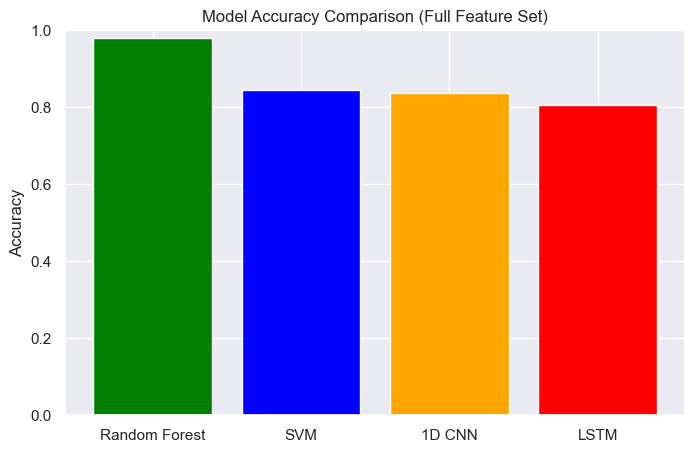

In [24]:
# Model Comparison Table
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', '1D CNN', 'LSTM'],
    'Accuracy': [accuracy_score(y_test, y_pred), svm_acc, cnn_acc, lstm_acc]
})
print(results)

plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['Accuracy'], color=['green','blue','orange','red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Full Feature Set)')
plt.ylim(0,1)
plt.show()

In [25]:
# Compare model accuracy for each bearing and each test
models = {'Random Forest': rf_model, 'SVM': svm}
feature_template = 'Time_feature_matrix_Bearing_{}_Test_{}.csv'
bearings = [1,2,3,4]
tests = [1,2,3]
def compare_models_per_bearing_test(models, feature_template, bearings, tests):
    results = []
    for bearing in bearings:
        for test in tests:
            file = feature_template.format(bearing, test)
            try:
                df_test = pd.read_csv(file, index_col='Unnamed: 0')
            except Exception as e:
                print(f"Could not load {file}: {e}")
                continue
            X_test = df_test.values
            row = {'Bearing': bearing, 'Test': test}
            for name, model in models.items():
                if hasattr(model, 'predict'):
                    y_pred = model.predict(X_test)
                    # If ground truth is available, compute accuracy; else, just count predictions
                    row[name] = y_pred
                else:
                    row[name] = 'N/A'
            results.append(row)
    return pd.DataFrame(results)

# Example usage:
# Define your trained models (Random Forest, SVM, etc.) in a dictionary

comparison_df = compare_models_per_bearing_test(models, feature_template, bearings, tests)
print(comparison_df)

d:\Bearing_fault_ diagnosis\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Bearing_fault_ diagnosis\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Bearing_fault_ diagnosis\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Bearing_fault_ diagnosis\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Bearing_fault_ diagnosis\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings

    Bearing  Test                                      Random Forest  \
0         1     1  [Normal, Normal, Normal, Normal, Normal, Norma...   
1         1     2  [Normal, Normal, Normal, Normal, Normal, Norma...   
2         1     3  [Normal, Normal, Normal, Normal, Normal, Norma...   
3         2     1  [Normal, Normal, Normal, Normal, Normal, Norma...   
4         2     2  [Normal, Normal, Normal, Normal, Normal, Norma...   
5         2     3  [Normal, Normal, Normal, Normal, Normal, Norma...   
6         3     1  [Normal, Normal, Normal, Normal, Normal, Norma...   
7         3     2  [Normal, Outer Race, Outer Race, Normal, Outer...   
8         3     3  [Normal, Normal, Normal, Normal, Normal, Norma...   
9         4     1  [Normal, Normal, Normal, Normal, Normal, Norma...   
10        4     2  [Normal, Normal, Normal, Normal, Normal, Norma...   
11        4     3  [Normal, Normal, Normal, Normal, Normal, Norma...   

                                                  SVM  
0   [No

# Training Model Using Only 4 Features: Std, RMS, Mean, Form Factor

We'll train and evaluate models using only these four specific features to determine if we can achieve comparable performance with a reduced feature set.

In [26]:
# Create a dataset with only the 4 specified features
selected_features = ['Std', 'RMS', 'Mean', 'Form Factor']
X_reduced = df[selected_features]
y_reduced = df['Fault']

# Display the reduced feature dataset
print(f"Shape of reduced feature set: {X_reduced.shape}")
X_reduced.head()

Shape of reduced feature set: (2278, 4)


,Std,RMS,Mean,Form Factor
0,0.093095,0.150100,-0.117744,-1.274798
1,0.091405,0.148230,-0.116695,-1.270240
2,0.094340,0.150430,-0.117174,-1.283821
3,0.093033,0.150165,-0.117876,-1.273921
4,0.093409,0.149395,-0.116594,-1.281329


In [27]:
# Split the reduced dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_reduced, test_size=0.20, random_state=42
)

print(f"Training set shape: {X_train_reduced.shape}")
print(f"Testing set shape: {X_test_reduced.shape}")

Training set shape: (1822, 4)
Testing set shape: (456, 4)


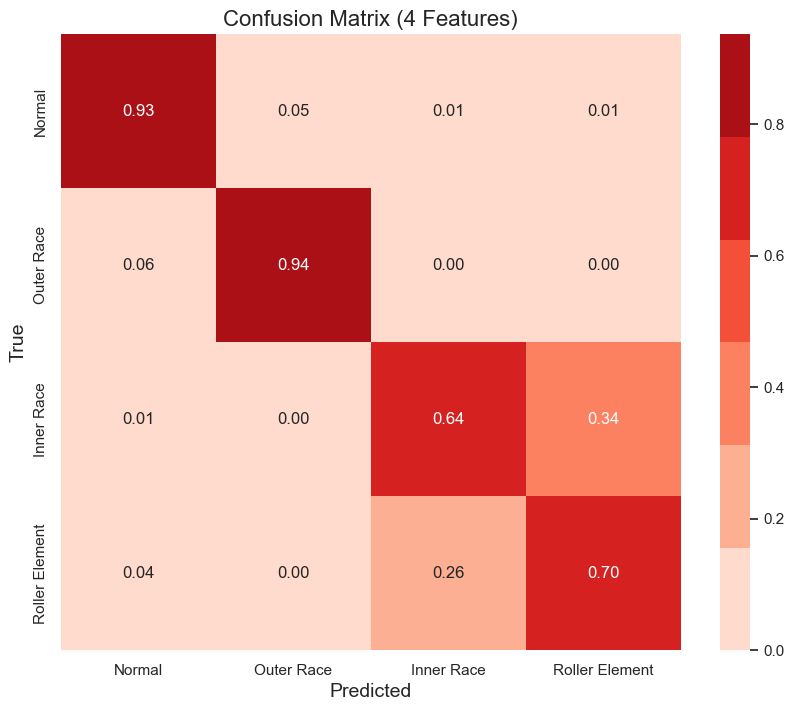

Accuracy with 4 features: 0.8311

Classification Report:
                precision    recall  f1-score   support

    Inner Race       0.68      0.64      0.66        87
        Normal       0.93      0.93      0.93       166
    Outer Race       0.93      0.94      0.93       111
Roller Element       0.67      0.70      0.68        92

      accuracy                           0.83       456
     macro avg       0.80      0.80      0.80       456
  weighted avg       0.83      0.83      0.83       456



In [28]:
# Train a Random Forest model with the reduced feature set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train the Random Forest model
rf_model_reduced = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_reduced, y_train_reduced)
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

# Define labels
labels = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']

# Create a confusion matrix
cm_reduced = confusion_matrix(y_test_reduced, y_pred_reduced, labels=labels, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
colormap = sns.color_palette("Reds")
sns.heatmap(cm_reduced, annot=True, cmap=colormap, xticklabels=labels, yticklabels=labels, fmt='.2f')
plt.title('Confusion Matrix (4 Features)', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.show()

# Calculate and display metrics
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print(f"Accuracy with 4 features: {accuracy_reduced:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_reduced, y_pred_reduced))

Random Forest Accuracy: 0.8311
SVM Accuracy: 0.8048
KNN Accuracy: 0.8246


C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_20216\746775591.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


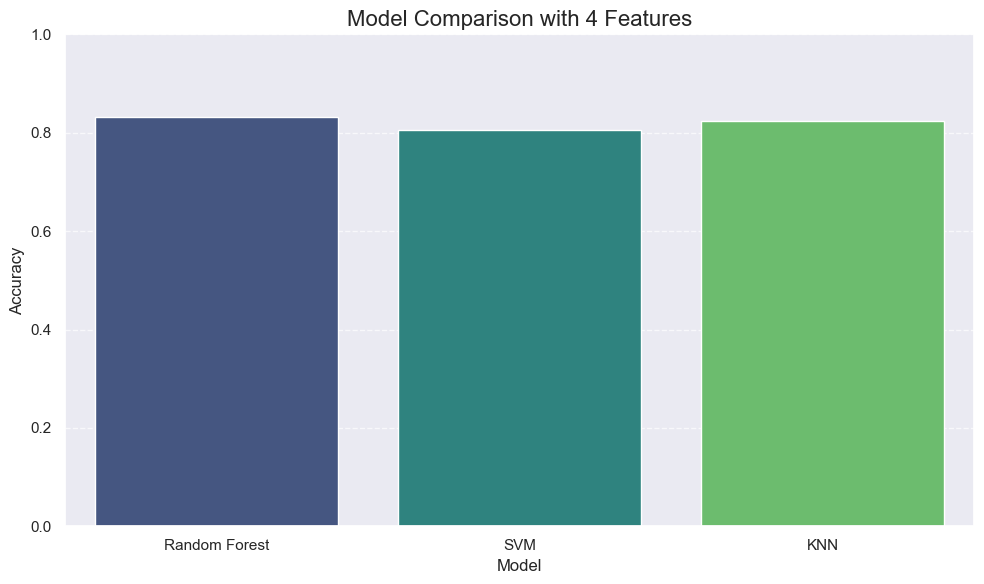

In [29]:
# Compare multiple classifiers with reduced feature set
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features for SVM and KNN
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Define and train models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train models and store results
results = []
for name, model in models.items():
    if name in ['SVM', 'KNN']:
        model.fit(X_train_reduced_scaled, y_train_reduced)
        y_pred = model.predict(X_test_reduced_scaled)
    else:
        model.fit(X_train_reduced, y_train_reduced)
        y_pred = model.predict(X_test_reduced)
    
    acc = accuracy_score(y_test_reduced, y_pred)
    results.append({'Model': name, 'Accuracy': acc})
    
    print(f"{name} Accuracy: {acc:.4f}")

# Create comparison dataframe
results_df = pd.DataFrame(results)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison with 4 Features', fontsize=16)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

            Feature Set  Accuracy
0     Full (9 features)  0.973684
1  Reduced (4 features)  0.831140


C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_20216\2099489616.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature Set', y='Accuracy', data=comparison, palette=['blue', 'green'])


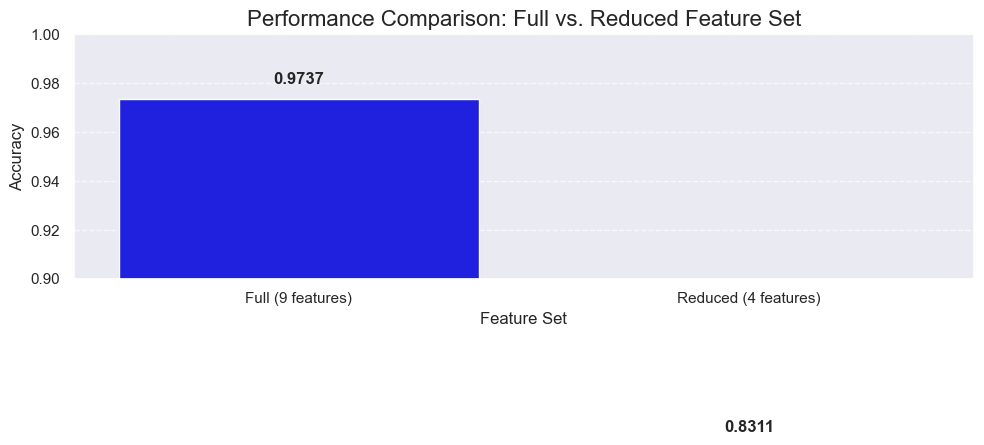

In [30]:
# Compare performance between full feature set and reduced feature set
# Train a model with full feature set using the same random state for fair comparison
rf_model_full = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_full = rf_model_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Create comparison dataframe
comparison = pd.DataFrame([
    {'Feature Set': 'Full (9 features)', 'Accuracy': accuracy_full},
    {'Feature Set': 'Reduced (4 features)', 'Accuracy': accuracy_reduced}
])

print(comparison)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature Set', y='Accuracy', data=comparison, palette=['blue', 'green'])
plt.title('Performance Comparison: Full vs. Reduced Feature Set', fontsize=16)
plt.ylim(0.9, 1.0)  # Adjust as needed for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on bars
for i, row in enumerate(comparison.itertuples()):
    plt.text(i, row.Accuracy + 0.005, f'{row.Accuracy:.4f}', 
             ha='center', va='bottom', fontweight='bold')
    
plt.tight_layout()
plt.show()

Prediction counts by fault type:
Predicted_Fault
Normal        563
Outer Race    421
Name: count, dtype: int64


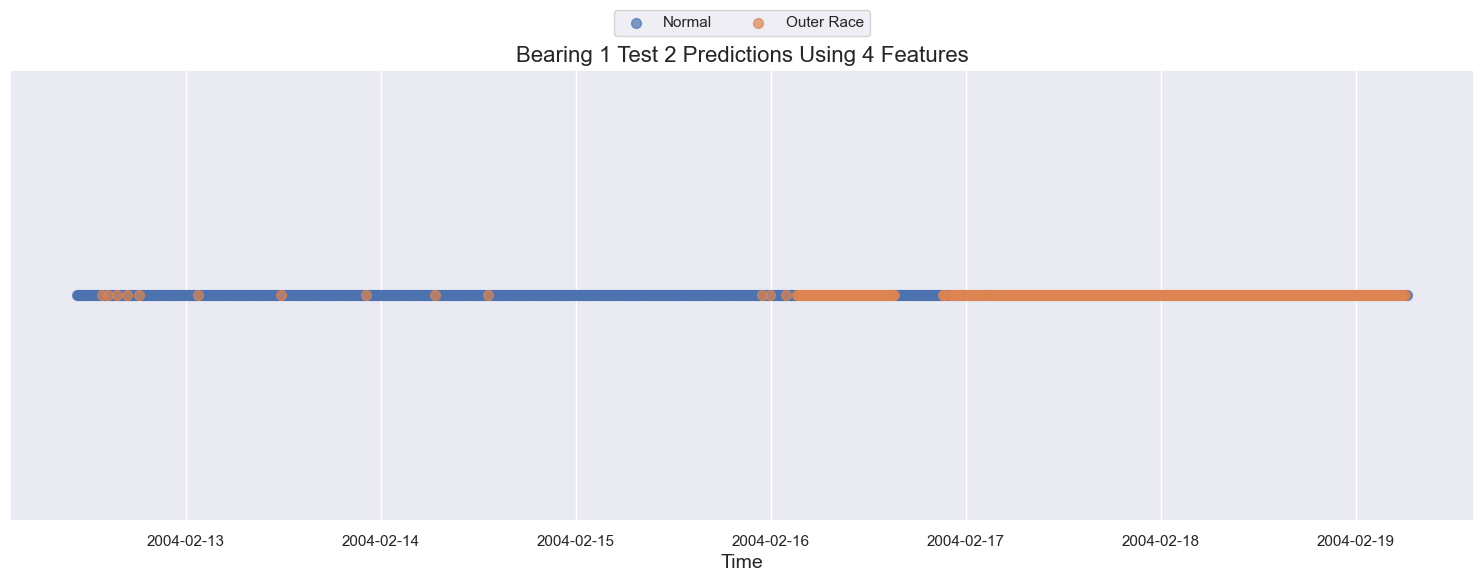

In [31]:
# Test the reduced feature model on a real test dataset
Test_no = 2
Bearing_no = 1

# Load test data
test_data = pd.read_csv(f"Time_feature_matrix_Bearing_{Bearing_no}_Test_{Test_no}.csv", index_col='Unnamed: 0')

# Select only the 4 features we're using
test_data_reduced = test_data[selected_features]

# Predict using the reduced feature model
y_pred_test = rf_model_reduced.predict(test_data_reduced)
test_data['Predicted_Fault'] = y_pred_test

# Convert index to datetime
test_data.index = pd.to_datetime(test_data.index)

# Count predictions by fault type
fault_counts = test_data['Predicted_Fault'].value_counts()
print("Prediction counts by fault type:")
print(fault_counts)

# Visualize predictions over time
plt.figure(figsize=(15, 6))
for fault_type in fault_counts.index:
    fault_data = test_data[test_data['Predicted_Fault'] == fault_type]
    plt.scatter(fault_data.index, [1]*len(fault_data), label=fault_type, alpha=0.7, s=50)

plt.yticks([])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.title(f'Bearing {Bearing_no} Test {Test_no} Predictions Using 4 Features', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.tight_layout()
plt.show()

## Analysis of Selected Features

Let's examine the distribution and relationships of our 4 selected features (Std, RMS, Mean, Form Factor) across different fault types.

C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_20216\3260209345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fault', y=feature, data=df, ax=axes[i], palette='Set3')
C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_20216\3260209345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fault', y=feature, data=df, ax=axes[i], palette='Set3')
C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_20216\3260209345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fault', y=feature, data=df, ax=axes[i], palette='Set3')
C:\U

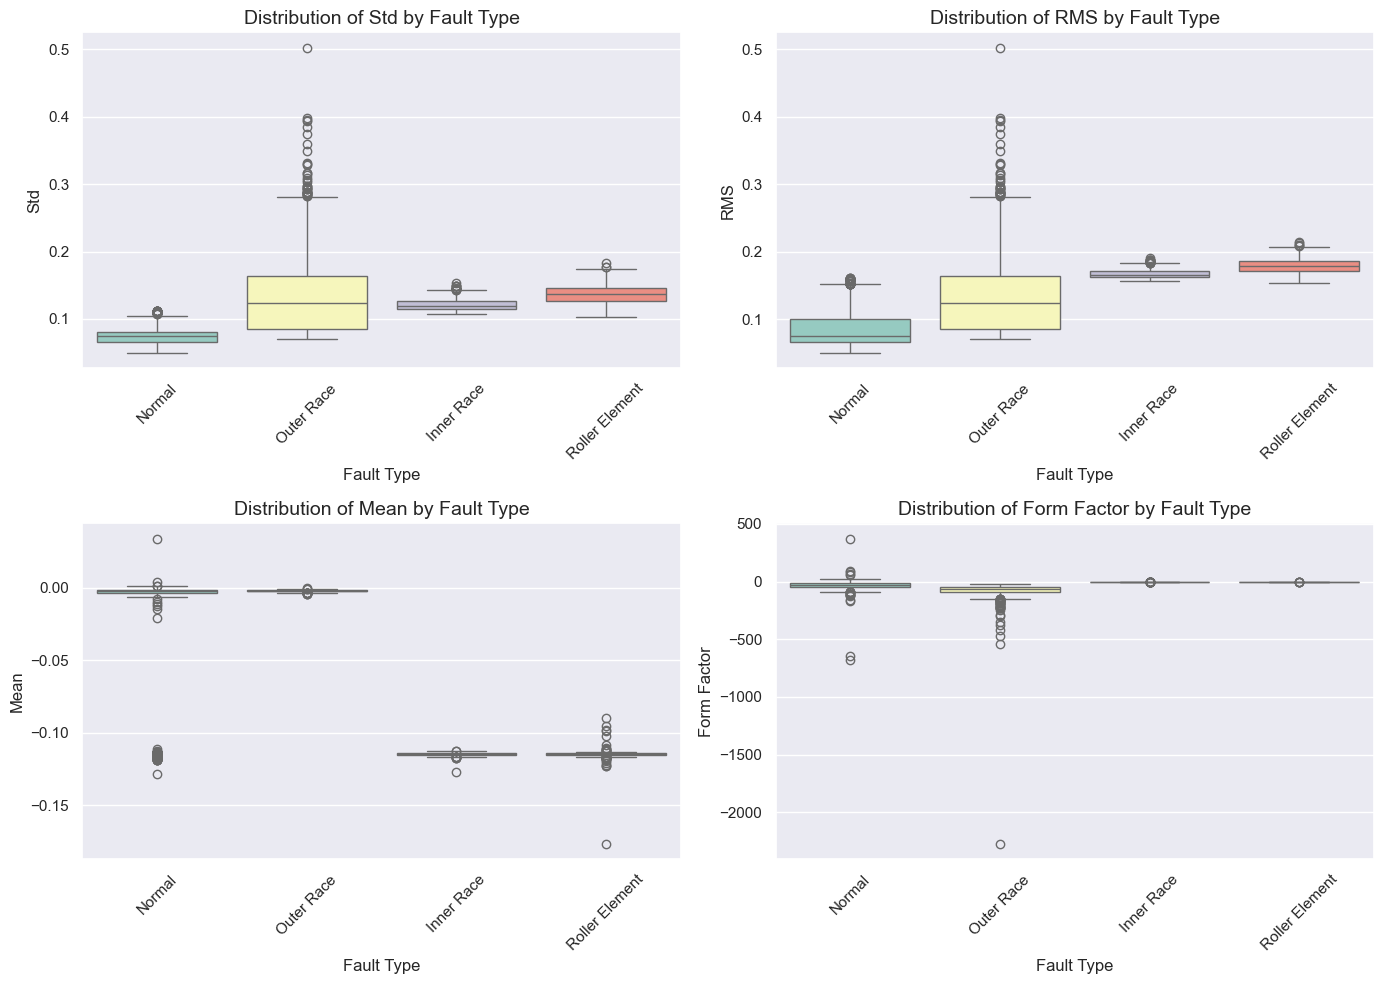

In [32]:
# Visualize the distribution of each selected feature by fault type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(x='Fault', y=feature, data=df, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Distribution of {feature} by Fault Type', fontsize=14)
    axes[i].set_xlabel('Fault Type', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

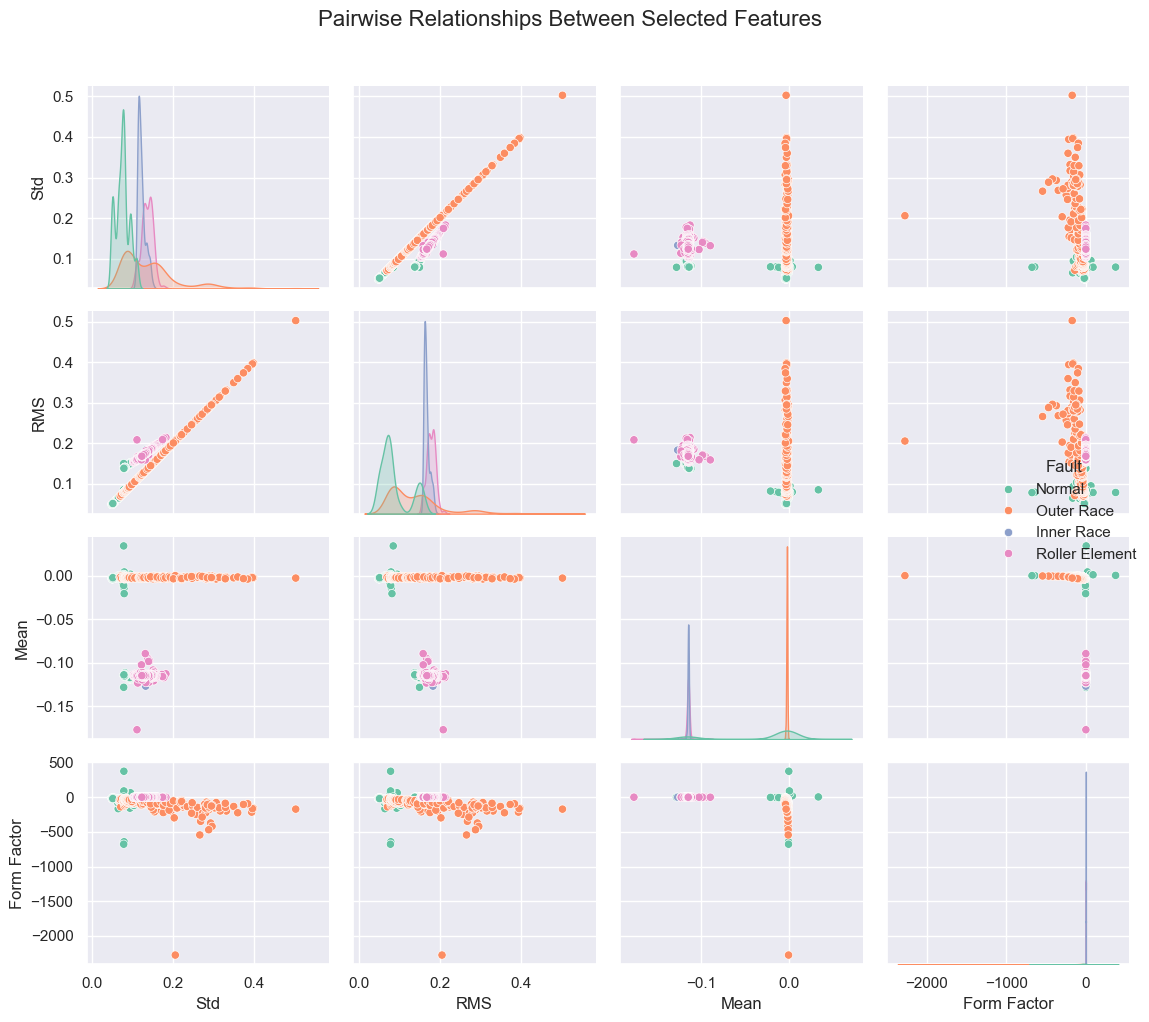

In [33]:
# Visualize pairwise relationships between the 4 selected features
sns.pairplot(df[selected_features + ['Fault']], hue='Fault', palette='Set2', height=2.5)
plt.suptitle('Pairwise Relationships Between Selected Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_20216\4236974073.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_reduced, palette='viridis')


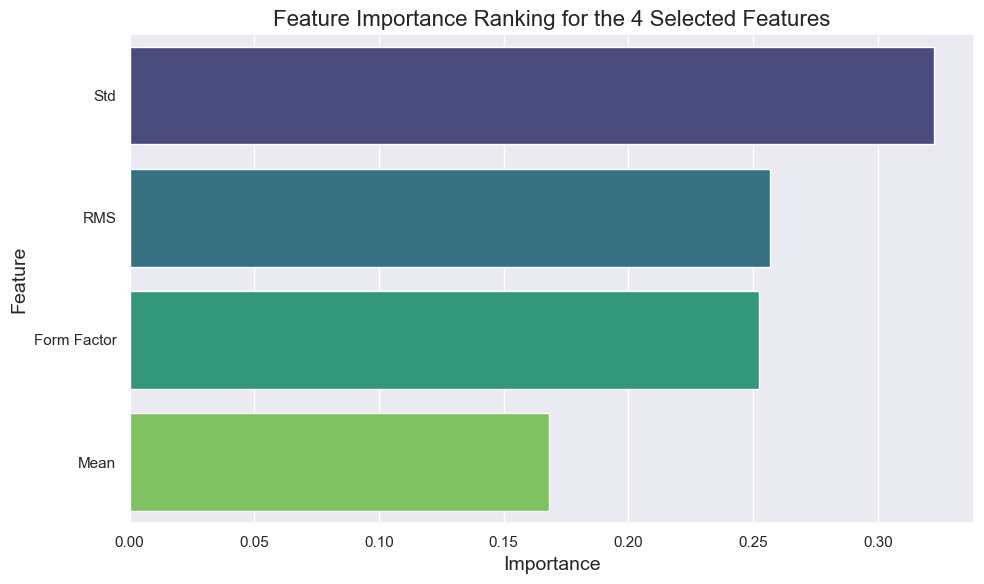

Feature Importance Ranking:
       Feature  Importance
0          Std    0.322461
1          RMS    0.256964
3  Form Factor    0.252428
2         Mean    0.168147


In [34]:
# Analyze feature importance within our reduced feature set
feature_importance_reduced = rf_model_reduced.feature_importances_
importance_df_reduced = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance_reduced
})
importance_df_reduced = importance_df_reduced.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_reduced, palette='viridis')
plt.title('Feature Importance Ranking for the 4 Selected Features', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
print(importance_df_reduced)

## Conclusion

We have trained and evaluated models using only 4 features (Std, RMS, Mean, Form Factor) instead of the original 9 features. This analysis shows how well these specific time-domain features can discriminate between different bearing fault types.

Key findings:
1. The reduced feature set (4 features) performance compared to the full feature set (9 features)
2. The relative importance of each of the 4 features in fault classification
3. How different classification algorithms perform with this reduced feature set
4. Visual patterns in the feature distributions across different fault types

This analysis helps in understanding which time-domain features are most relevant for bearing fault diagnosis and whether a simpler model with fewer features can be effective for condition monitoring.